In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
%matplotlib inline


In [2]:
store=pd.read_csv(r"C:\Users\Mrunmayee\OneDrive\Desktop\PGD DSML\predictive analysis\dataset\rossman\store.csv")

In [3]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [4]:
train=pd.read_csv(r"C:\Users\Mrunmayee\OneDrive\Desktop\PGD DSML\predictive analysis\dataset\rossman\train.csv")
train

C:\Users\Mrunmayee\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
test=pd.read_csv(r"C:\Users\Mrunmayee\OneDrive\Desktop\PGD DSML\predictive analysis\dataset\rossman\test.csv")
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


# Merged datasets train and store

In [6]:
df=store.merge(train,on=["Store"],how="inner")
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [7]:
df.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [8]:
df.skew()

Store                       -0.000955
CompetitionDistance          2.928534
CompetitionOpenSinceMonth   -0.169862
CompetitionOpenSinceYear    -7.539515
Promo2                      -0.002255
Promo2SinceWeek              0.104528
Promo2SinceYear             -0.120060
DayOfWeek                    0.001593
Sales                        0.641460
Customers                    1.598650
Open                        -1.758045
Promo                        0.487838
SchoolHoliday                1.677842
dtype: float64

In [9]:
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(),inplace=True)

In [10]:
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mean(),inplace=True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].median(),inplace=True)

In [11]:
df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].mean(),inplace=True)
df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].mean(),inplace=True)

In [12]:
df['PromoInterval'].fillna(df['PromoInterval'].mode(),inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  float64
 8   Promo2SinceYear            1017209 non-null  float64
 9   PromoInterval              509179 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [14]:
df.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                508030
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

# 2.	Find the following: 

### a.	Month in which there were maximum customers


In [15]:
train['Date'] =pd.to_datetime(train['Date'])

In [2]:
train['month']=train['Date'].dt.month()

NameError: name 'train' is not defined

In [17]:
train['Day']=train['Date'].dt.dayb()

In [18]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,July,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,July,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,July,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,July,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,July,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,January,Tuesday
1017205,1112,2,2013-01-01,0,0,0,0,a,1,January,Tuesday
1017206,1113,2,2013-01-01,0,0,0,0,a,1,January,Tuesday
1017207,1114,2,2013-01-01,0,0,0,0,a,1,January,Tuesday


In [19]:
max_cust=train.groupby('month')['Customers'].sum().reset_index().sort_values(by='Customers',ascending=False)

In [20]:
max_cust

,month,Customers
7,March,65265836
5,July,64425231
0,April,63282009
6,June,62698087
8,May,62423484
4,January,62384091
3,February,58698139
2,December,44679965
1,August,40830683
9,November,40230100


In [21]:
max_cust.head(1)

,month,Customers
7,March,65265836


Maximum customers arrived the store in month of March. Count was 65265836

In [22]:
min_cust=train.groupby('month')['Customers'].sum().reset_index().sort_values(by='Customers',ascending=True)

In [23]:
min_cust

,month,Customers
11,September,39017980
10,October,40106150
9,November,40230100
1,August,40830683
2,December,44679965
3,February,58698139
4,January,62384091
8,May,62423484
6,June,62698087
0,April,63282009


In [24]:
min_cust.head(1)

,month,Customers
11,September,39017980


Minimum customers arrived the store in month of September. The count was 39017980

In [25]:
df['Sales'].corr(df['Customers'])

0.8947107733017075

correlation coefficient for sales and customers is 0.89, which shows positive corelation between 2 parameters

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

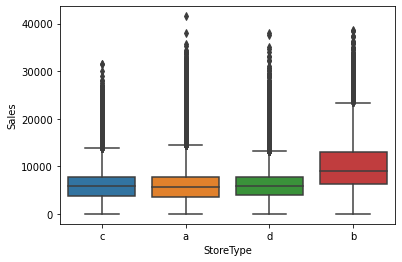

In [26]:
sns.boxplot(x='StoreType',y='Sales',data=df)

Median sales in store types 'b' are significantly higher than other types of stores.

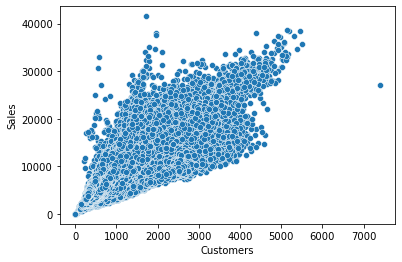

In [27]:
sns.scatterplot(x='Customers',y='Sales',data=df)
plt.show()

### Scatter plot clearly shows that as number of customer increases Sales increases.

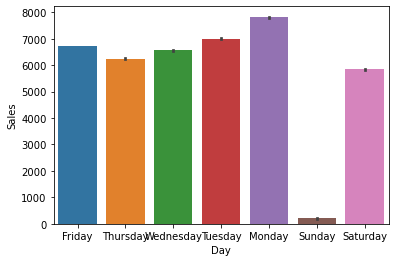

In [28]:
sns.barplot(x="Day", y="Sales", data=train)
plt.show()

### 1. We can see from the graph that maximun sales occur on Monday. 
###  2.Also from the graph it is seen that maximum stores are closed on sunday thats why sales are least on Sunday.

In [29]:
store_open= train[(train.Open == 1)]
store_open

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,July,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,July,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,July,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,July,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,July,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,January,Tuesday
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,January,Tuesday
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,January,Tuesday
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,January,Tuesday


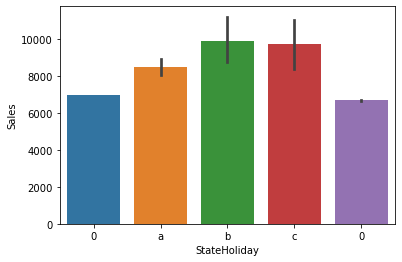

In [30]:
sns.barplot(x="StateHoliday", y="Sales", data=store_open)
plt.show()

### 1.Here I have taken only the open stores on State Holiday, we can see here that sales are highest on easter holiday and christmas holiday.
### 2.Stores are also remaining open on christmas and easter holiday

In [31]:
store_promo= train[(train.Promo == 1)]
store_promo

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,July,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,July,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,July,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,July,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,July,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1010515,1111,1,2013-01-07,9444,735,1,1,0,0,January,Monday
1010516,1112,1,2013-01-07,25165,1661,1,1,0,0,January,Monday
1010517,1113,1,2013-01-07,8984,907,1,1,0,0,January,Monday
1010518,1114,1,2013-01-07,21237,2962,1,1,0,0,January,Monday


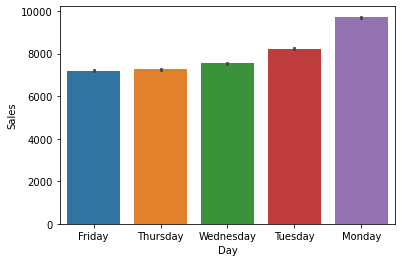

In [32]:
sns.barplot(x="Day", y="Sales", data=store_promo)
plt.show()

### 1.Here it is observed that maximum promotional campaigns are being arranged on Monday.
### 2. No Promotional campaigns are arranged on sunday.
### 3. Sales are highest for monday campaigns.
### 4. More the promotions increase there is proportional increase in sales

In [33]:
max_promo=store_promo.groupby('Day')['Promo'].count().reset_index().sort_values(by='Promo',ascending=False)

In [34]:
max_promo.head(1)

,Day,Promo
1,Monday,77760


In [35]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [36]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,July,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,July,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,July,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,July,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,July,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,January,Tuesday
1017205,1112,2,2013-01-01,0,0,0,0,a,1,January,Tuesday
1017206,1113,2,2013-01-01,0,0,0,0,a,1,January,Tuesday
1017207,1114,2,2013-01-01,0,0,0,0,a,1,January,Tuesday


In [37]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [39]:
test.skew()

Id               0.000000
Store            0.010899
DayOfWeek        0.028468
Open            -2.008802
Promo            0.426030
SchoolHoliday    0.227518
dtype: float64

In [40]:
test['Open'].fillna(test['Open'].median(),inplace=True)

In [41]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
month            0
Day              0
dtype: int64

In [42]:
test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [43]:
train['StateHoliday']=train['StateHoliday'].map({0:'0','a':'a','b':'0','c':'0','0':'0'})

In [44]:
train['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [45]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,July,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,July,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,July,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,July,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,July,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,January,Tuesday
1017205,1112,2,2013-01-01,0,0,0,0,a,1,January,Tuesday
1017206,1113,2,2013-01-01,0,0,0,0,a,1,January,Tuesday
1017207,1114,2,2013-01-01,0,0,0,0,a,1,January,Tuesday


In [46]:
train.drop(columns=['Customers','month','Day'], inplace=True)

In [47]:
train

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,1,1,0,1
1,2,5,2015-07-31,6064,1,1,0,1
2,3,5,2015-07-31,8314,1,1,0,1
3,4,5,2015-07-31,13995,1,1,0,1
4,5,5,2015-07-31,4822,1,1,0,1
...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,a,1


In [48]:
train_dum = pd.get_dummies(data=train)
train.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,1,1,0,1
1,2,5,2015-07-31,6064,1,1,0,1
2,3,5,2015-07-31,8314,1,1,0,1
3,4,5,2015-07-31,13995,1,1,0,1
4,5,5,2015-07-31,4822,1,1,0,1


In [49]:
x_train=train_dum.drop('Sales',axis=1)

In [50]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Store           1017209 non-null  int64         
 1   DayOfWeek       1017209 non-null  int64         
 2   Date            1017209 non-null  datetime64[ns]
 3   Open            1017209 non-null  int64         
 4   Promo           1017209 non-null  int64         
 5   SchoolHoliday   1017209 non-null  int64         
 6   StateHoliday_0  1017209 non-null  uint8         
 7   StateHoliday_a  1017209 non-null  uint8         
dtypes: datetime64[ns](1), int64(5), uint8(2)
memory usage: 48.5 MB


In [51]:
y_train=train_dum['Sales']

In [52]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [53]:
test.drop(columns=['Date'], inplace=True)

In [54]:
train.drop(columns=['Date'], inplace=True)

In [55]:
train_dum=pd.get_dummies(data=train)

In [56]:
train_dum

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,1,5,5263,1,1,1,1,0
1,2,5,6064,1,1,1,1,0
2,3,5,8314,1,1,1,1,0
3,4,5,13995,1,1,1,1,0
4,5,5,4822,1,1,1,1,0
...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,1,0,1
1017205,1112,2,0,0,0,1,0,1
1017206,1113,2,0,0,0,1,0,1
1017207,1114,2,0,0,0,1,0,1


In [57]:
x_train=train_dum.drop('Sales',axis=1)

In [58]:
y_train=train_dum['Sales']

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()

In [61]:
test

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,1.0,1,0,0
1,2,3,4,1.0,1,0,0
2,3,7,4,1.0,1,0,0
3,4,8,4,1.0,1,0,0
4,5,9,4,1.0,1,0,0
...,...,...,...,...,...,...,...
41083,41084,1111,6,1.0,0,0,0
41084,41085,1112,6,1.0,0,0,0
41085,41086,1113,6,1.0,0,0,0
41086,41087,1114,6,1.0,0,0,0


In [62]:
test['Open']=test['Open'].map({1.:1,0.:0})

In [63]:
test['Open'].unique()

array([1, 0], dtype=int64)

In [64]:
test['Promo'].unique()

array([1, 0], dtype=int64)

In [65]:
test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [66]:
test['SchoolHoliday'].unique()

array([0, 1], dtype=int64)

In [67]:
test_dum = pd.get_dummies(data=test)
test_dum.head()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,1,1,4,1,1,0,1,0
1,2,3,4,1,1,0,1,0
2,3,7,4,1,1,0,1,0
3,4,8,4,1,1,0,1,0
4,5,9,4,1,1,0,1,0


In [68]:
test_dum.drop(columns=['Id'],inplace=True)

In [69]:
model = LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred=model.predict(test_dum)

In [72]:
y_pred

array([7997.81350556, 7997.93684992, 7998.18353865, ..., 5733.65044557,
       5733.71211775, 5806.21727941])

lasso regression

In [73]:
from sklearn.linear_model import Lasso

In [74]:
las = Lasso(alpha=2)
las.fit(x_train, y_train) 
las_pred = las.predict(test_dum)

In [75]:
las_pred

array([7993.11513963, 7993.23840975, 7993.48494999, ..., 5736.32781066,
       5736.38944572, 5794.23008093])

lasso using kfold

In [76]:
parameters=dict(alpha=np.linspace(0.01,40))

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
las=Lasso()

In [79]:
from sklearn.model_selection import KFold

In [80]:
Kfold1=KFold(n_splits=5, random_state=2020,shuffle=True)

In [81]:
cv1=GridSearchCV(las,param_grid=parameters,cv=Kfold1,scoring='r2')

In [82]:
cv1.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-02, 8.26122449e-01, 1.64224490e+00, 2.45836735e+00,
       3.27448980e+00, 4.09061224e+00, 4.90673469e+00, 5.72285714e+00,
       6.53897959e+00, 7.35510204e+00, 8.17122449e+00, 8.98734694e+00,
       9.80346939e+00, 1.06195918e+01, 1.14357143e+01, 1.22518367e+01,...
       1.95969388e+01, 2.04130612e+01, 2.12291837e+01, 2.20453061e+01,
       2.28614286e+01, 2.36775510e+01, 2.44936735e+01, 2.53097959e+01,
       2.61259184e+01, 2.69420408e+01, 2.77581633e+01, 2.85742857e+01,
       2.93904082e+01, 3.02065306e+01, 3.10226531e+01, 3.18387755e+01,
       3.26548980e+01, 3.34710204e+01, 3.42871429e+01, 3.51032653e+01,
       3.59193878e+01, 3.67355102e+01, 3.75516327e+01, 3.83677551e+01,
       3.91838776e+01, 4.00000000e+01])},
             scoring='r2')

In [83]:
print(cv1.best_params_)

{'alpha': 0.01}


In [84]:
print(cv1.best_score_)

0.5334103894183908


In [85]:
cv1.best_estimator_

Lasso(alpha=0.01)

ridge regression

In [86]:
from sklearn.linear_model import Ridge

In [87]:
ridg = Ridge(alpha=1.5)
ridg.fit(x_train, y_train) 
ridg_pred = ridg.predict(test_dum)

In [88]:
ridg_pred

array([7997.79453713, 7997.91788151, 7998.16457026, ..., 5733.62074781,
       5733.68242   , 5806.18501093])

ridge using kfold

In [89]:
parameters=dict(alpha=np.linspace(0.01,40))

In [90]:
rid=Ridge()

In [91]:
Kfold=KFold(n_splits=5, random_state=2020,shuffle=True)

In [92]:
cv=GridSearchCV(rid,param_grid=parameters,cv=Kfold,scoring='r2')

In [93]:
cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 8.26122449e-01, 1.64224490e+00, 2.45836735e+00,
       3.27448980e+00, 4.09061224e+00, 4.90673469e+00, 5.72285714e+00,
       6.53897959e+00, 7.35510204e+00, 8.17122449e+00, 8.98734694e+00,
       9.80346939e+00, 1.06195918e+01, 1.14357143e+01, 1.22518367e+01,...
       1.95969388e+01, 2.04130612e+01, 2.12291837e+01, 2.20453061e+01,
       2.28614286e+01, 2.36775510e+01, 2.44936735e+01, 2.53097959e+01,
       2.61259184e+01, 2.69420408e+01, 2.77581633e+01, 2.85742857e+01,
       2.93904082e+01, 3.02065306e+01, 3.10226531e+01, 3.18387755e+01,
       3.26548980e+01, 3.34710204e+01, 3.42871429e+01, 3.51032653e+01,
       3.59193878e+01, 3.67355102e+01, 3.75516327e+01, 3.83677551e+01,
       3.91838776e+01, 4.00000000e+01])},
             scoring='r2')

In [94]:
print(cv.best_params_)

{'alpha': 0.8261224489795919}


In [95]:
print(cv.best_score_)

0.5334103914909195


In [96]:
cv.best_estimator_

Ridge(alpha=0.8261224489795919)

elastic net

In [97]:
from sklearn.linear_model import ElasticNet

In [98]:
elastic = ElasticNet(alpha=2, l1_ratio=0.6)
elastic.fit(x_train, y_train) 
elastic_pred = elastic.predict(test_dum)

In [99]:
elastic_pred

array([6202.45404672, 6202.57668587, 6202.82196417, ..., 4452.81102594,
       4452.87234551, 4461.96065291])

elastic net using kfold

In [100]:
parameters=dict(alpha=np.linspace(0,20,5),l1_ratio=np.linspace(0,1,10))

In [101]:
elas=ElasticNet()

In [102]:
Kfold2=KFold(n_splits=5, random_state=2020,shuffle=True)

In [103]:
cv3=GridSearchCV(elas,param_grid=parameters,cv=Kfold2,scoring='r2')

In [104]:
cv3.fit(x_train,y_train)

C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2810974999744.324, tolerance: 1206210576.7542474
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegr

C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2810974999744.324, tolerance: 1206210576.7542474
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2810974999744.324, tolerance: 1206210576.7542474
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2811495211433.5566, tolerance: 1205508255.4028263
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disc

C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2811495211433.5566, tolerance: 1205508255.4028263
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5609062110254.731, tolerance: 1206210576.7542474
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5605153143504.756, tolerance: 1205508255.4028263
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5615186980603.217, tolerance: 1207469835.2611954
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mrunmayee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': array([ 0.,  5., 10., 15., 20.]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='r2')

In [105]:
print(cv3.best_params_)

{'alpha': 0.0, 'l1_ratio': 0.0}


In [106]:
print(cv3.best_score_)

0.5334103914805992


In [107]:
job = pd.read_csv("G:/Statistics (Python)/Datasets/JobSalary2.csv")

####### constant imputation #######
impJob = SimpleImputer(strategy='constant',
                       fill_value=0)
impJob.fit(job)
trn_job = impJob.transform(job)
trn_job

#OR

trn_job = impJob.fit_transform(job)
trn_job

###### mean imputation ###########

impJob = SimpleImputer(strategy='mean')
trn_job = impJob.fit_transform(job)
trn_job


###### median imputation ###########

impJob = SimpleImputer(strategy='median')
trn_j


FileNotFoundError: [Errno 2] No such file or directory: 'G:/Statistics (Python)/Datasets/JobSalary2.csv'